In [118]:
import pandas as pd
import numpy as np
from nilearn import datasets, image, plotting
import nibabel as nib
from scipy import stats
from collections import Counter
import os
from collections import Counter
import csv

datasets_path = "D:\\code\\SC_ADHD\\datasets\\ABCD\\task-fMRI"
src_activation_path = os.path.join(datasets_path, "Destrieux")

## atlas image and labels

In [73]:
# load destrieux parcellation
destrieux = datasets.fetch_atlas_destrieux_2009()
destrieux_map_img = nib.load(destrieux.maps)
destrieux_labels = destrieux.labels
# destrieux_labels.remove("L Medial_wall")
# destrieux_labels.remove("R Medial_wall")

print(len(destrieux_labels))
# destrieux_map_img_data = destrieux_map_img.get_fdata()
# print(destrieux_map_img_data.shape)
# print(np.unique(destrieux_map_img_data))

[fetch_atlas_destrieux_2009] Dataset found in C:\Users\dell\nilearn_data\destrieux_2009

151


C:\Users\dell\AppData\Local\Temp\ipykernel_69612\2804111229.py:2: UserWarning: 
The following regions are present in the atlas look-up table,
but missing from the atlas image:

 index          name
    42 L Medial_wall
   117 R Medial_wall

  destrieux = datasets.fetch_atlas_destrieux_2009()


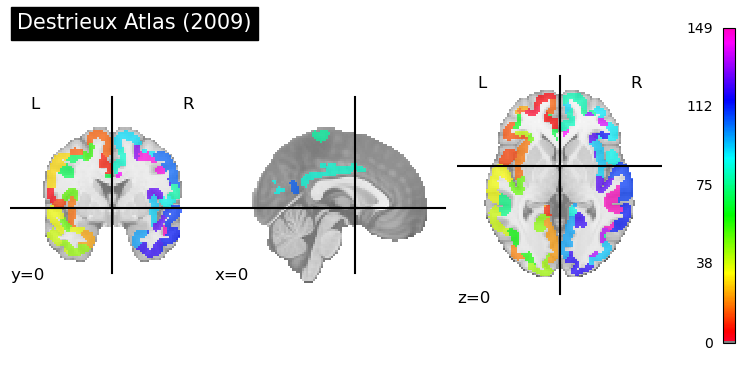

In [119]:
plotting.plot_roi(
    roi_img=destrieux_map_img,
    title="Destrieux Atlas (2009)",
    display_mode='ortho',       # 正交视图 (x, y, z 中心切片)
    cut_coords=(0, 0, 0),       # 切片坐标，可自动选择或手动设置
    black_bg=False,             # 白底
    annotate=True,              # 显示坐标和标签
    draw_cross=True,            # 显示十字线
    cmap='gist_rainbow',        # 使用多彩色图，便于区分区域
    dim=0.5                     # 降低背景对比度
)

plotting.show()

In [62]:
yeo_17 = datasets.fetch_atlas_yeo_2011(n_networks=17, thickness="thin")
yeo_17_map_img = nib.load(yeo_17.maps)
yeo17_labels = yeo_17.labels
print(yeo17_labels)
# yeo_17_map_img_data = nib.load(yeo_17_map_img).get_fdata()
# print(yeo_17_map_img_data.shape)
# print(np.unique(yeo_17_map_img_data))

[fetch_atlas_yeo_2011] Dataset found in C:\Users\dell\nilearn_data\yeo_2011

['Background', '17Networks_1', '17Networks_2', '17Networks_3', '17Networks_4', '17Networks_5', '17Networks_6', '17Networks_7', '17Networks_8', '17Networks_9', '17Networks_10', '17Networks_11', '17Networks_12', '17Networks_13', '17Networks_14', '17Networks_15', '17Networks_16', '17Networks_17']


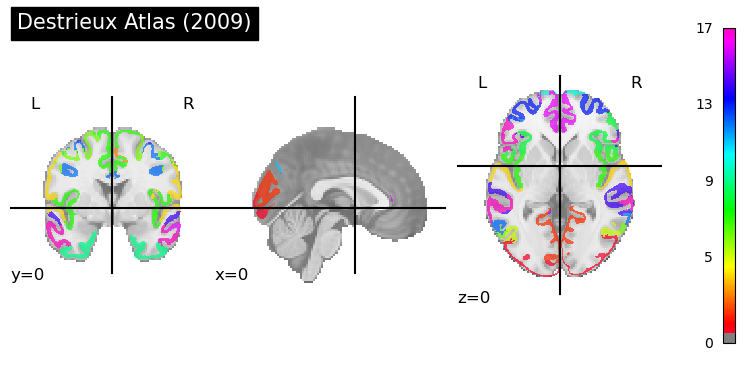

In [120]:
plotting.plot_roi(
    roi_img=yeo_17_map_img,
    title="Destrieux Atlas (2009)",
    display_mode='ortho',       # 正交视图 (x, y, z 中心切片)
    cut_coords=(0, 0, 0),       # 切片坐标，可自动选择或手动设置
    black_bg=False,             # 白底
    annotate=True,              # 显示坐标和标签
    draw_cross=True,            # 显示十字线
    cmap='gist_rainbow',        # 使用多彩色图，便于区分区域
    dim=0.5                     # 降低背景对比度
)

plotting.show()

## basic extraction

In [26]:
Destrieux_atlas_file = os.path.join(datasets_path, "Destrieux_atlas.csv")
with open(Destrieux_atlas_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Destrieux atlas label"])
    for label in destrieux_labels:
        writer.writerow([label])

In [84]:
src_sst_file_path = os.path.join(src_activation_path, "mri_y_tfmr_sst_csvcg_dst.csv")
src_sst_data = pd.read_csv(src_sst_file_path)
src_sst_data.head()
src_varname_list = src_sst_data.columns.tolist()
src_varname_list.remove("src_subject_id")
src_varname_list.remove("eventname")
src_varname_list.sort()

src_variable_name_file = os.path.join(datasets_path, "src_Destrieux_varname.csv")
with open(src_variable_name_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["src variable name"])
    for varname in src_varname_list:
        writer.writerow([varname])



In [20]:
columns = src_sst_data.columns.tolist()
columns.remove("src_subject_id")
columns.remove("eventname")

suffixes = []

for col in columns:
    parts = col.split('_')
    if len(parts) == 2:
        suffixes.append(parts[1])

count_result = Counter(suffixes)


freq_series = pd.Series(count_result).sort_values(ascending=False)
print("\n频次统计：")
print(freq_series)
src_labels = freq_series.keys()
print(len(src_labels))


频次统计：
154    6
228    6
155    6
229    6
156    6
      ..
294    6
221    6
295    6
222    6
296    6
Length: 148, dtype: int64
148


## reflection

In [52]:
# resample
destrieux_map_resample_img = image.resample_to_img(
    source_img=destrieux_map_img,
    target_img=yeo_17_map_img,
    interpolation='nearest',
    force_resample=True
)


C:\Users\dell\AppData\Local\Temp\ipykernel_69612\3914568311.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  destrieux_map_resample_img = image.resample_to_img(


In [113]:
destrieux_map_img_data = destrieux_map_resample_img.get_fdata()
print(destrieux_map_img_data.shape)
print(np.unique(destrieux_map_img_data))
yeo_17_map_img_data = yeo_17_map_img.get_fdata()
yeo_17_map_img_data = yeo_17_map_img_data.squeeze()
print(yeo_17_map_img_data.shape)
print(np.unique(yeo_17_map_img_data))
labels, counts = np.unique(yeo_17_map_img_data, return_counts=True)
df = pd.DataFrame({
    'Label': labels,
    'Voxel_Count': counts
})

df = df.sort_values('Label').reset_index(drop=True)

Yeo17_volume_size_file = 'yeo17_region_voxel_size.csv'
df.to_csv(os.path.join(datasets_path, Yeo17_volume_size_file), index=False)

(256, 256, 256)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150.]
(256, 256, 256)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [121]:

results_list = []

destrieux_region_ids = np.unique(destrieux_map_img_data)
destrieux_region_ids = destrieux_region_ids[destrieux_region_ids != 0]

for region_id in destrieux_region_ids:
    region_mask = (destrieux_map_img_data == region_id)
    region_yeo17_labels = yeo_17_map_img_data[region_mask]

    # non_zero_labels = region_yeo17_labels[region_yeo17_labels != 0]
    # print(non_zero_labels)
    # if non_zero_labels.size > 0:
    mode_result = stats.mode(region_yeo17_labels, keepdims=True)
    Yeo17_label = mode_result.mode[0]  # 取众数值


    results_list.append({
        'Destrieux_ID': int(region_id),
        'Yeo17_ID': int(Yeo17_label)
    })


     Destrieux_ID  Yeo17_ID
0               1         0
1               2         0
2               3         0
3               4         4
4               5         0
..            ...       ...
143           146         0
144           147        16
145           148         0
146           149         0
147           150         0

[148 rows x 2 columns]


In [127]:
df_mapping = pd.DataFrame(results_list)
print(df_mapping.loc[df_mapping["Yeo17_ID"] == 4])

     Destrieux_ID  Yeo17_ID
3               4         4
32             33         4
77             79         4
106           108         4


In [117]:
# count Yeo17 Volume
destrieux_to_yeo17 = {}
for item in results_list:
    destrieux_to_yeo17[item['Destrieux_ID']] = item['Yeo17_ID']

yeo17_voxel_count = {i: 0 for i in range(1, 18)}  # key: 1~17

for destrieux_id in destrieux_to_yeo17:
    region_mask = (destrieux_map_img_data == destrieux_id)
    voxel_count_in_region = np.sum(region_mask)

    yeo17_label = destrieux_to_yeo17[destrieux_id]

    if yeo17_label >= 1 and yeo17_label <= 17:
        yeo17_voxel_count[yeo17_label] += voxel_count_in_region

df_yeo17_volume = pd.DataFrame({
    'Yeo17_Network': list(yeo17_voxel_count.keys()),
    'Voxel_Count': list(yeo17_voxel_count.values())
})

df_yeo17_volume = df_yeo17_volume.sort_values('Yeo17_Network').reset_index(drop=True)

Yeo17_assigned_volume_file = 'yeo17_network_voxel_count_from_destrieux.csv'
df_yeo17_volume.to_csv(os.path.join(datasets_path, Yeo17_assigned_volume_file), index=False)
df_yeo17_volume

,Yeo17_Network,Voxel_Count
0,1,0
1,2,0
2,3,0
3,4,15712
4,5,2848
5,6,3232
6,7,7928
7,8,6816
8,9,20256
9,10,9304


In [100]:
df_mapping = pd.DataFrame(results_list)

destrieux_id_to_name = {i + 1: name for i, name in enumerate(destrieux_labels[1:], start=0)}
print(destrieux_id_to_name.pop(42))
destrieux_id_to_name.pop(117)

yeo17_label_name = {
    "17Networks_1": "VisCent",
    "17Networks_2": "VisPeri",
    "17Networks_3": "SomMotA",
    "17Networks_4": "SomMotB",
    "17Networks_5": "DorsAttnA",
    "17Networks_6": "DorsAttnB",
    "17Networks_7": "SalVentAttnA",
    "17Networks_8": "SalVentAttnB",
    "17Networks_9": "Limbic",
    "17Networks_10": "Limbic",
    "17Networks_11": "ContC",
    "17Networks_12": "ContA",
    "17Networks_13": "ContB",
    "17Networks_14": "TempPar",
    "17Networks_15": "DefaultC",
    "17Networks_16": "DefaultA",
    "17Networks_17": "DefaultB"
}

yeo_id_to_name = {i + 1: name for i, name in enumerate(yeo17_labels[1:], start=0)}

df_mapping['Destrieux atlas label'] = df_mapping['Destrieux_ID'].map(destrieux_id_to_name)
df_mapping['Yeo17 Label'] = df_mapping['Yeo17_ID'].map(yeo_id_to_name)
df_mapping['Yeo17 atlas label'] = df_mapping['Yeo17 Label'].map(yeo17_label_name)

df_mapping = df_mapping[['Destrieux_ID', 'Destrieux atlas label', 'Yeo17_ID', 'Yeo17 Label', 'Yeo17 atlas label']]
df_mapping.insert(0, 'index', range(1, len(df_mapping) + 1))
df_mapping.head()

L Medial_wall


,index,Destrieux_ID,Destrieux atlas label,Yeo17_ID,Yeo17 Label,Yeo17 atlas label
0,1,1,L G_and_S_frontomargin,10,17Networks_10,Limbic
1,2,2,L G_and_S_occipital_inf,1,17Networks_1,VisCent
2,3,3,L G_and_S_paracentral,3,17Networks_3,SomMotA
3,4,4,L G_and_S_subcentral,4,17Networks_4,SomMotB
4,5,5,L G_and_S_transv_frontopol,10,17Networks_10,Limbic


In [101]:
Destrieux2Yeo17_reflect_table = os.path.join(datasets_path, "Destrieux2Yeo17_reflect.csv")
df_mapping.to_csv(Destrieux2Yeo17_reflect_table, index=False)

## reflect column names(sst)

In [83]:
# sst_all_correct.stop.vs.correct
# Note: connect by Destrieux atlas label
src_variable_name_file = os.path.join(datasets_path, "sst_all_correct.stop.vs.correct.csv")
reflect_df = pd.read_csv(src_variable_name_file)

reflect_df = pd.merge(reflect_df, df_mapping, on='Destrieux atlas label')
reflect_df.to_csv(src_variable_name_file, index=False)


In [89]:
# save as new tables
prefixes = [name.split('_')[0] for name in src_varname_list]
col_start_str = set(prefixes)
col_start_str = sorted(col_start_str)
col_start_str

['tfsstabwdp',
 'tfsstasemdp',
 'tfsstr1bwdp',
 'tfsstr1semdp',
 'tfsstr2bwdp',
 'tfsstr2semdp']

In [107]:
# print(df_mapping.head())
for start_col in col_start_str:
    col_names = [name for name in src_varname_list if name.startswith(start_col)]
    col_names = sorted(col_names)
    min_col_idx = int(col_names[0].split('_')[-1])
    columns_to_select = ['src_subject_id', 'eventname'] + col_names
    sub_table = src_sst_data[columns_to_select]
    for col_name in col_names:
        postfix_id = int(col_name.split('_')[-1]) - min_col_idx + 1
        Destrieux_atlas_label = df_mapping.loc[df_mapping["index"] == postfix_id, "Destrieux atlas label"]
        Destrieux_atlas_label = Destrieux_atlas_label.iloc[0]
        sub_table = sub_table.rename(columns={col_name: Destrieux_atlas_label})
    save_file_name = start_col + ".csv"
    sub_table.to_csv(os.path.join(datasets_path, save_file_name), index=False)





## reflect column names(nback)

In [110]:
src_nback_file_path = os.path.join(src_activation_path, "mri_y_tfmr_nback_2bv0b_dst.csv")
src_nback_data = pd.read_csv(src_nback_file_path)
src_nback_data.head()
src_varname_list = src_nback_data.columns.tolist()
src_varname_list.remove("src_subject_id")
src_varname_list.remove("eventname")
src_varname_list.sort()

prefixes = [name.split('_')[0] for name in src_varname_list]
col_start_str = set(prefixes)
col_start_str = sorted(col_start_str)
col_start_str

['tfabwdp', 'tfnbr1semdp', 'tfnbr2bwdp', 'tfnbr2dp', 'tfncr1bwdp', 'tnbasemdp']

In [112]:
for start_col in col_start_str:
    col_names = [name for name in src_varname_list if name.startswith(start_col)]
    col_names = sorted(col_names)
    min_col_idx = int(col_names[0].split('_')[-1])
    columns_to_select = ['src_subject_id', 'eventname'] + col_names
    sub_table = src_nback_data[columns_to_select]
    for col_name in col_names:
        postfix_id = int(col_name.split('_')[-1]) - min_col_idx + 1
        Destrieux_atlas_label = df_mapping.loc[df_mapping["index"] == postfix_id, "Destrieux atlas label"]
        Destrieux_atlas_label = Destrieux_atlas_label.iloc[0]
        sub_table = sub_table.rename(columns={col_name: Destrieux_atlas_label})
    save_file_name = start_col + ".csv"
    sub_table.to_csv(os.path.join(datasets_path, "nback", save_file_name), index=False)